In [1]:
import pandas as pd
import numpy as np

In [3]:
df_industry = pd.read_parquet('rawdata/industry.parquet')

#### 第二部分，计算factors

In [4]:
df_factor = pd.read_parquet('eps_rawdata.parquet')


In [5]:
df_factor = df_factor[['order_book_id','quarter','info_date','adj_net_profit']]

df_factor = df_factor.sort_values(['info_date','order_book_id'])
df_industry = df_industry.sort_values(['date','order_book_id'])
df_factor = pd.merge_asof(df_industry,df_factor, left_on=['date'],right_on=['info_date'],by=['order_book_id'],direction='backward')

In [7]:
df_market = pd.read_parquet('rawdata/processed_market_data.parquet')
df_factor = pd.merge(df_factor,df_market,on=['order_book_id','date'])

In [8]:
df_factor['RPE'] = df_factor['adj_net_profit']/df_factor['total_a']/df_factor['close']

In [9]:
df_factor

,order_book_id,first_industry_code,date,quarter,info_date,adj_net_profit,adj_close,adj_factor,adj_high,adj_low,...,total_turnover,turnover_rate,volume,st_change,halt_change,day_count,ret_overnight,ret_day,ret_daily,RPE
0,000001,40,2016-01-04,2015q3,2015-10-23,6.155000e+09,7.631433,1.484649,8.102925,7.564077,...,6.603762e+08,0.004774,56349787.0,False,False,489,-0.005296,0.011535,0.006239,0.037966
1,000004,35,2016-01-04,2015q3,2015-10-31,3.031473e+06,41.310000,1.000000,46.600000,41.310000,...,9.767487e+07,0.027223,2283380.0,False,False,480,-0.092229,0.031467,-0.060763,0.000874
2,000005,42,2016-01-04,2015q3,2015-10-30,-6.647514e+06,9.040000,1.000000,10.000000,9.040000,...,3.022410e+08,0.035394,32340643.0,False,False,390,-0.097345,0.090686,-0.006659,-0.000695
3,000006,42,2016-01-04,2015q3,2015-10-28,1.921660e+07,8.336709,1.245096,9.252302,8.320646,...,2.546398e+08,0.017358,23285271.0,False,False,490,-0.070328,0.040415,-0.029913,0.001371
4,000008,26,2016-01-04,2015q3,2015-10-31,2.561229e+07,10.427593,1.017493,11.675759,10.417765,...,1.570146e+08,0.021913,14039993.0,False,False,325,-0.086711,0.115583,0.028872,0.001002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8184301,688799,35,2024-11-18,2024q3,2024-10-29,3.987200e+07,39.840000,1.000000,40.980000,39.600000,...,4.225785e+07,0.011193,1049896.0,False,False,812,0.003765,0.011753,0.015518,0.010670
8184302,688800,60,2024-11-18,2024q3,2024-10-25,4.060403e+07,37.080000,1.000000,38.580000,36.710000,...,1.491871e+08,0.025215,3994572.0,False,False,805,0.006742,0.047415,0.054157,0.006912
8184303,688819,27,2024-11-18,2024q3,2024-10-30,2.957513e+08,29.870000,1.000000,30.600000,29.650000,...,9.441172e+07,0.003226,3135956.0,False,False,928,0.009039,0.015926,0.024965,0.010185
8184304,688981,60,2024-11-18,2024q2,2024-08-30,1.191788e+09,92.300000,1.000000,97.500000,91.370000,...,7.818658e+09,0.041691,82897403.0,False,False,1053,-0.002167,0.030402,0.028235,0.006494


In [10]:
# 每日每个行业的EPS中位数
result = df_factor.groupby(['first_industry_code', 'date']).agg( RPE_related_median=('RPE', 'median'),
                                               RPE_related_std=('RPE', 'std') ) 

result = result.reset_index()

In [11]:
df = pd.merge(df_factor,result,on=['first_industry_code','date'],how='outer')
df

,order_book_id,first_industry_code,date,quarter,info_date,adj_net_profit,adj_close,adj_factor,adj_high,adj_low,...,volume,st_change,halt_change,day_count,ret_overnight,ret_day,ret_daily,RPE,RPE_related_median,RPE_related_std
0,000001,40,2016-01-04,2015q3,2015-10-23,6.155000e+09,7.631433,1.484649,8.102925,7.564077,...,56349787.0,False,False,489,-0.005296,0.011535,0.006239,0.037966,0.043998,0.267502
1,002142,40,2016-01-04,2015q3,2015-10-30,1.776651e+09,8.811288,1.633132,9.539949,8.792918,...,31961800.0,False,False,489,-0.013899,0.027484,0.013586,0.031659,0.043998,0.267502
2,600000,40,2016-01-04,2015q3,2015-10-30,1.334900e+10,9.039665,1.969099,9.283431,8.912704,...,42240610.0,False,False,475,-0.016292,0.025700,0.009407,0.040204,0.043998,0.267502
3,600015,40,2016-01-04,2015q3,2015-10-31,4.668000e+09,6.515654,1.754237,6.863383,6.498552,...,40111596.0,False,False,490,-0.018373,0.024064,0.005691,0.038220,0.043998,0.267502
4,600016,40,2016-01-04,2015q3,2015-10-31,1.179100e+10,4.780447,1.888945,5.055733,4.769859,...,83867659.0,False,False,490,-0.008859,0.018994,0.010135,0.044185,0.043998,0.267502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8184301,603958,34,2024-11-18,2024q3,2024-10-30,-2.928656e+07,12.300000,1.000000,13.300000,12.150000,...,12830400.0,False,False,2023,0.000000,0.030894,0.030894,-0.010854,0.006183,0.014353
8184302,605003,34,2024-11-18,2024q3,2024-10-24,2.074705e+07,18.080000,1.000000,19.470000,17.800000,...,2597599.0,False,False,1015,0.000000,0.045354,0.045354,0.010432,0.006183,0.014353
8184303,605055,34,2024-11-18,2024q3,2024-10-31,-4.861121e+05,5.160000,1.000000,5.350000,5.100000,...,5021600.0,False,False,919,0.000000,0.005814,0.005814,-0.000214,0.006183,0.014353
8184304,605138,34,2024-11-18,2024q3,2024-10-29,9.477090e+06,5.550000,1.000000,5.660000,5.460000,...,3214900.0,False,False,743,0.012613,0.010676,0.023289,0.003074,0.006183,0.014353


In [12]:
from backtesting import process_factors,neutralize_factors,calculate_and_plot_ic,calculate_benchmark_return,custom_quantile_grouping,get_pnl,plot_cumulative_returns,calculate_annual_metrics

In [13]:
df['DST'] = df['RPE'] - df['RPE_related_median']
df['PRM'] = df['DST'] / df['RPE_related_std']


df['DST_mean'] = df.groupby('order_book_id')['DST'].rolling(250).mean().reset_index(0,drop=True)
df['DST_std'] = df.groupby('order_book_id')['DST'].rolling(250).std().reset_index(0,drop=True)
df['DST_zscore'] = (df['DST']-df['DST_mean'])/df['DST_std']

df['PRM_mean'] = df.groupby('order_book_id')['PRM'].rolling(250).mean().reset_index(0,drop=True)
df['PRM_std'] = df.groupby('order_book_id')['PRM'].rolling(250).std().reset_index(0,drop=True)
df['PRM_zscore'] = (df['PRM']-df['PRM_mean'])/df['PRM_std']

df['RPE_mean'] = df.groupby('order_book_id')['RPE'].rolling(250).mean().reset_index(0,drop=True)
df['RPE_std'] = df.groupby('order_book_id')['RPE'].rolling(250).std().reset_index(0,drop=True)
df['RPE_zscore'] = (df['RPE']-df['RPE_mean'])/df['RPE_std']


df = df.dropna()

In [14]:
df_industry = pd.read_parquet('rawdata/industry.parquet')
df_industry['order_book_id'] = df_industry['order_book_id'].str[:6]

df_industry = pd.merge(df_market[['order_book_id','date']], df_industry, how = 'left')
df_industry['first_industry_code'] = df_industry['first_industry_code'].ffill()
df_industry.dropna(inplace=True)

df_industry = pd.get_dummies(df_industry, columns = ['first_industry_code'],prefix='industry')
df_industry = df_industry.astype({col: 'int' for col in df_industry.columns if col.startswith('industry_')})

In [15]:
df = process_factors(df,factors= ['RPE'],process_method='rank')
df = neutralize_factors(df, factors=  ['RPE'], market_factor=False,momentum_factor=False, industry_factor=True, df_industry = df_industry)
df = df.drop(['industry_10', 'industry_11', 'industry_12',
       'industry_20', 'industry_21', 'industry_22', 'industry_23',
       'industry_24', 'industry_25', 'industry_26', 'industry_27',
       'industry_28', 'industry_30', 'industry_31', 'industry_32',
       'industry_33', 'industry_34', 'industry_35', 'industry_36',
       'industry_37', 'industry_40', 'industry_41', 'industry_42',
       'industry_43', 'industry_50', 'industry_60', 'industry_61',
       'industry_62', 'industry_63', 'industry_70'],axis=1)

df = df.rename(columns={'neu_RPE_process':'sector_neu'})

C:\Users\yun.tang\jupyter notebook\portfolio\可比\代码整理\backtesting.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{factor}_process'] = df.groupby('date')[factor].rank(method='average', ascending=True)


yes,it is rank
Finish neutralize


In [16]:
df

,order_book_id,first_industry_code,date,quarter,info_date,adj_net_profit,adj_close,adj_factor,adj_high,adj_low,...,DST_std,DST_zscore,PRM_mean,PRM_std,PRM_zscore,RPE_mean,RPE_std,RPE_zscore,RPE_process,sector_neu
0,000001,40,2017-01-10,2016q3,2016-10-21,6.427000e+09,7.505731,1.219069,7.513934,7.497528,...,0.003874,1.024228,-0.031672,0.013181,0.830423,0.038865,0.004436,0.460621,1254.0,-12.0
1,600015,40,2017-01-10,2016q3,2016-10-31,4.811000e+09,6.547642,1.690685,6.571301,6.523983,...,0.004688,-0.232307,-0.014319,0.015991,-0.453759,0.043685,0.003298,-0.913738,1253.0,-13.0
2,600016,40,2017-01-10,2016q3,2016-10-29,1.218700e+10,4.971910,1.816203,4.982922,4.960898,...,0.002848,0.323244,-0.007812,0.014296,0.294142,0.046673,0.006162,-0.162885,1260.0,-6.0
3,600036,40,2017-01-10,2016q3,2016-10-29,1.701200e+10,13.254263,1.353527,13.365085,13.232099,...,0.003558,0.431313,-0.008964,0.017350,0.370616,0.046358,0.006509,-0.059860,1261.0,-5.0
4,601009,40,2017-01-10,2016q3,2016-10-25,2.019657e+09,5.348533,2.088423,5.439511,5.338957,...,0.002725,-0.520006,-0.050299,0.007046,-1.448551,0.033184,0.002983,-1.119929,1233.0,-33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6732706,603958,34,2024-11-18,2024q3,2024-10-30,-2.928656e+07,12.300000,1.000000,13.300000,12.150000,...,0.004404,-1.710824,-0.669454,0.224041,-2.310093,0.000050,0.004479,-2.434542,388.0,-2182.0
6732707,605003,34,2024-11-18,2024q3,2024-10-24,2.074705e+07,18.080000,1.000000,19.470000,17.800000,...,0.001147,2.312940,0.113017,0.083750,2.185701,0.011176,0.002155,-0.345183,3504.0,934.0
6732708,605055,34,2024-11-18,2024q3,2024-10-31,-4.861121e+05,5.160000,1.000000,5.350000,5.100000,...,0.006527,-0.161459,-0.414484,0.446944,-0.069778,0.004236,0.006455,-0.689467,1261.0,-1309.0
6732709,605138,34,2024-11-18,2024q3,2024-10-29,9.477090e+06,5.550000,1.000000,5.660000,5.460000,...,0.001943,2.366843,-0.577945,0.179538,2.012607,0.001872,0.002033,0.591121,2052.0,-518.0


In [17]:
df['sector_neu_mean']= df.groupby('order_book_id')['sector_neu'].rolling(250).mean().reset_index(0,drop=True)
df['sector_neu_std'] = df.groupby('order_book_id')['sector_neu'].rolling(250).std().reset_index(0,drop=True)
df['sector_neu_zscore'] = (df['sector_neu']-df['sector_neu_mean'])/df['sector_neu_std']

#### 第三部分 因子回测

In [18]:
df_rpe = df.copy()

In [19]:
df_rpe = process_factors(df_rpe,factors= ['RPE','DST','PRM','RPE_zscore','DST_zscore','PRM_zscore','sector_neu','sector_neu_zscore'],process_method='rank')
df_rpe = neutralize_factors(df_rpe, factors=  ['RPE','DST','PRM','RPE_zscore','DST_zscore','PRM_zscore','sector_neu','sector_neu_zscore'], market_factor=True,
                                        momentum_factor=True, industry_factor=True, df_industry = df_industry)

yes,it is rank
yes,it is rank
yes,it is rank
yes,it is rank
yes,it is rank
yes,it is rank
yes,it is rank
yes,it is rank
Finish neutralize


In [20]:
df_rpe

,order_book_id,first_industry_code,date,quarter,info_date,adj_net_profit,adj_close,adj_factor,adj_high,adj_low,...,industry_63,industry_70,neu_RPE_process,neu_DST_process,neu_PRM_process,neu_RPE_zscore_process,neu_DST_zscore_process,neu_PRM_zscore_process,neu_sector_neu_process,neu_sector_neu_zscore_process
0,000001,40,2018-01-16,2017q3,2017-10-21,6.599000e+09,11.818462,1.201510,11.968273,11.668650,...,0,0,-38.500000,-1660.000000,-302.500000,-95.250000,-122.000000,-1056.750000,-44.000000,-229.250000
1,600015,40,2018-01-16,2017q3,2017-10-31,4.420000e+09,6.794394,1.386437,6.816032,6.729479,...,0,0,257.500000,36.500000,106.000000,-188.000000,540.500000,130.500000,266.000000,-53.375000
2,600016,40,2018-01-16,2017q3,2017-10-31,1.249300e+10,5.064202,1.753485,5.075608,5.018578,...,0,0,104.500000,590.500000,57.000000,184.750000,426.000000,394.250000,113.000000,57.875000
3,600036,40,2018-01-16,2017q3,2017-10-28,1.969800e+10,24.362277,1.308991,24.660217,24.094896,...,0,0,-193.500000,-1583.000000,-443.000000,44.500000,-201.250000,-775.250000,-211.000000,-163.750000
4,601288,40,2018-01-16,2017q3,2017-10-31,5.147200e+10,2.798932,1.482708,2.819166,2.731488,...,0,0,-237.000000,47.000000,-357.000000,202.000000,259.500000,359.750000,-256.500000,25.375000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5501552,603958,34,2024-11-18,2024q3,2024-10-30,-2.928656e+07,12.300000,1.000000,13.300000,12.150000,...,0,0,-1900.994767,-1819.625712,-1821.131964,-1973.318230,-2233.731850,-2383.185470,-1914.077368,-1702.797260
5501553,605003,34,2024-11-18,2024q3,2024-10-24,2.074705e+07,18.080000,1.000000,19.470000,17.800000,...,0,0,1164.640204,1171.045980,1171.256565,188.827333,1947.651630,1891.387034,1243.113117,1384.373370
5501554,605055,34,2024-11-18,2024q3,2024-10-31,-4.861121e+05,5.160000,1.000000,5.350000,5.100000,...,0,0,-1169.605596,-1227.877971,-1210.016403,-307.524455,-429.200272,-264.312778,-1343.964739,-886.215774
5501555,605138,34,2024-11-18,2024q3,2024-10-29,9.477090e+06,5.550000,1.000000,5.660000,5.460000,...,0,0,-639.986932,-900.360112,-894.661654,1640.566171,2065.557334,1879.033676,-815.435138,1459.828783


In [21]:
df_rpe = df_rpe[df_rpe['date']>='2017-01-01']


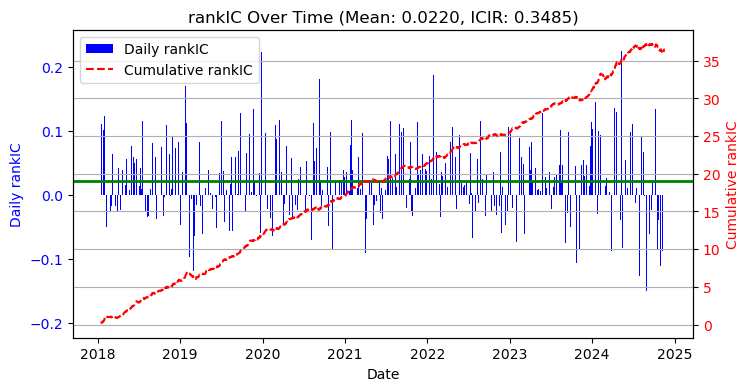

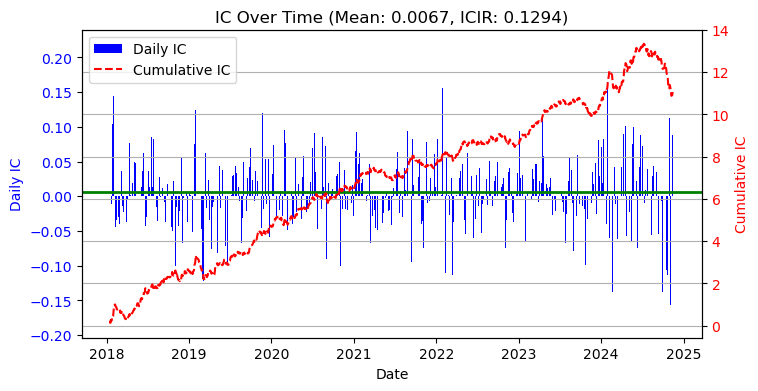

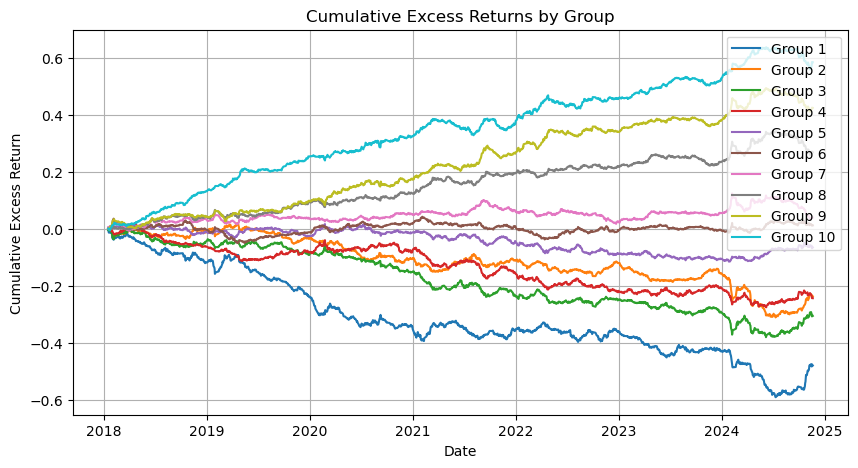

,net_excess_return,gross_excess_return,sharpe_net,sharpe_gross,turnover_rate
quantile,,,,,
0,-0.089009,-0.072425,-1.701081,-1.386386,0.055279
1,-0.069024,-0.035812,-1.610963,-0.838764,0.110706
2,-0.087678,-0.046139,-2.035821,-1.073438,0.138462
3,-0.085367,-0.036765,-2.103898,-0.908010,0.162007
4,-0.064442,-0.009866,-1.970617,-0.301673,0.181920
5,-0.056691,0.001801,-1.904236,0.060425,0.194974
6,-0.054328,0.005997,-1.645750,0.181811,0.201081
7,-0.017250,0.040566,-0.475949,1.118970,0.192720
8,0.017091,0.064057,0.423986,1.587267,0.156554


In [22]:
calculate_and_plot_ic(df_rpe, factor='neu_RPE_process', ret='ret_daily', ic_type='both')

# 算benchmark
df1 = calculate_benchmark_return(df_rpe, 'neu_RPE_process', 'ret_overnight', 'ret_day', 'ret_daily')

df1['neu_RPE_process'] = df1['neu_RPE_process'].astype('float')

# 分组
df1['quantile'] = df1.groupby(['date'])['neu_RPE_process'].transform(lambda x: pd.qcut(x,10,labels=False,duplicates='drop'))

pnl_result = get_pnl(df1)

plot_cumulative_returns(pnl_result.pivot(index='date', columns='quantile', values='cum_gross_excess'))

result_table = calculate_annual_metrics(pnl_result)
result_table

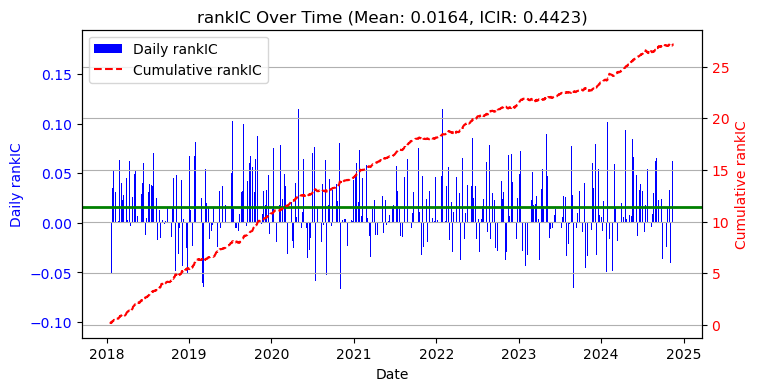

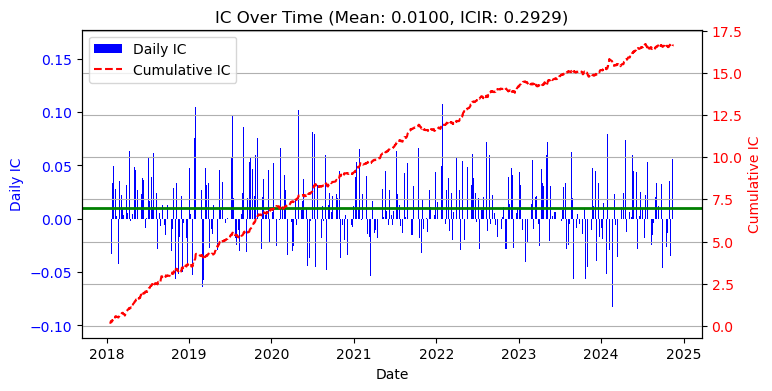

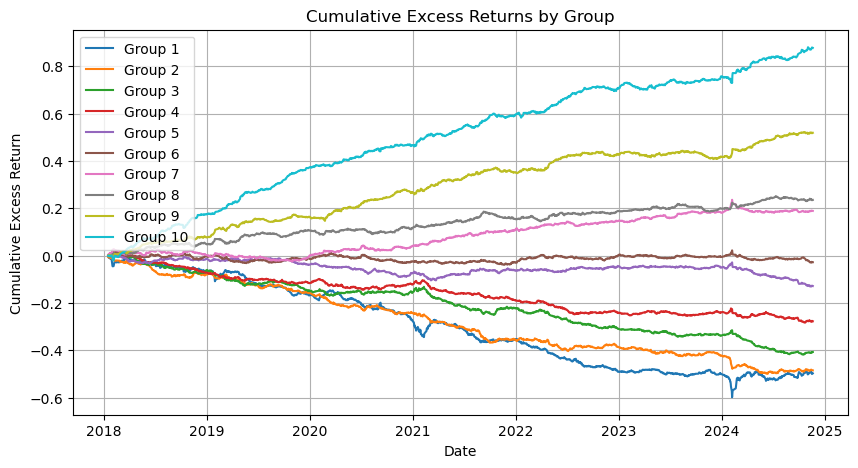

,net_excess_return,gross_excess_return,sharpe_net,sharpe_gross,turnover_rate
quantile,,,,,
0,-0.111897,-0.075097,-2.498300,-1.683118,0.122668
1,-0.145941,-0.073158,-4.759874,-2.411589,0.242610
2,-0.148344,-0.061465,-5.144171,-2.158188,0.289597
3,-0.136083,-0.041831,-5.038809,-1.574892,0.314171
4,-0.117973,-0.019365,-4.527667,-0.755656,0.328692
5,-0.105750,-0.004212,-4.320083,-0.173303,0.338459
6,-0.074352,0.028520,-2.958396,1.132528,0.342905
7,-0.063164,0.035513,-2.432517,1.363131,0.328923
8,-0.005369,0.078318,-0.175655,2.544090,0.278958


In [23]:
calculate_and_plot_ic(df_rpe, factor='neu_RPE_zscore_process', ret='ret_daily', ic_type='both')

# 算benchmark
df1 = calculate_benchmark_return(df_rpe, 'neu_RPE_zscore_process', 'ret_overnight', 'ret_day', 'ret_daily')

df1['neu_RPE_zscore_process'] = df1['neu_RPE_zscore_process'].astype('float')

# 分组
df1['quantile'] = df1.groupby(['date'])['neu_RPE_zscore_process'].transform(lambda x: pd.qcut(x,10,labels=False,duplicates='drop'))

pnl_result = get_pnl(df1)

plot_cumulative_returns(pnl_result.pivot(index='date', columns='quantile', values='cum_gross_excess'))

result_table = calculate_annual_metrics(pnl_result)
result_table

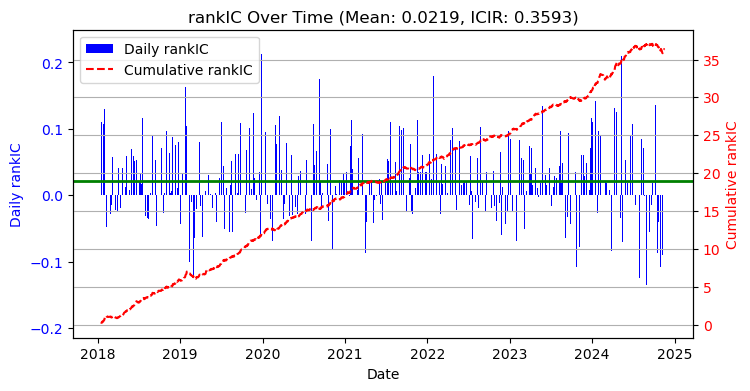

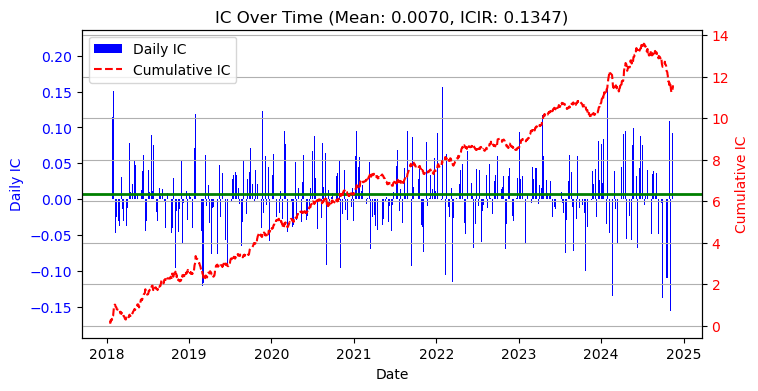

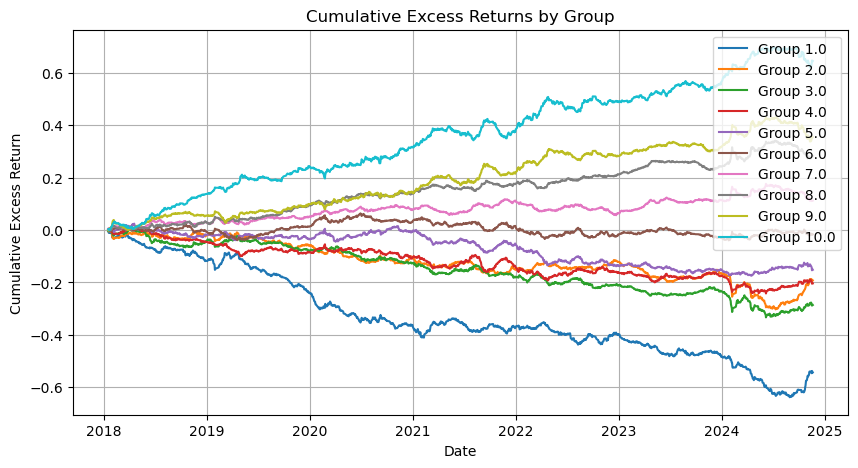

,net_excess_return,gross_excess_return,sharpe_net,sharpe_gross,turnover_rate
quantile,,,,,
0.0,-0.101636,-0.082006,-2.097200,-1.695537,0.065435
1.0,-0.067627,-0.029046,-1.623390,-0.699933,0.128603
2.0,-0.088756,-0.043171,-2.363831,-1.153510,0.151950
3.0,-0.082491,-0.030737,-2.179795,-0.815123,0.172516
4.0,-0.080214,-0.022887,-2.231145,-0.636861,0.191092
5.0,-0.063343,-0.002480,-1.862733,-0.072824,0.202878
6.0,-0.044171,0.016952,-1.491893,0.573103,0.203743
7.0,-0.014239,0.042694,-0.430849,1.291678,0.189776
8.0,0.006550,0.053563,0.155702,1.271896,0.156709


In [24]:
calculate_and_plot_ic(df_rpe, factor='neu_DST_process', ret='ret_daily', ic_type='both')

# 算benchmark
df1 = calculate_benchmark_return(df_rpe, 'neu_DST_process', 'ret_overnight', 'ret_day', 'ret_daily')

df1['neu_DST_process'] = df1['neu_DST_process'].astype('float')

# 分组
df1 = custom_quantile_grouping(df1, 'date', 'neu_DST_process')

pnl_result = get_pnl(df1)

plot_cumulative_returns(pnl_result.pivot(index='date', columns='quantile', values='cum_gross_excess'))

calculate_annual_metrics(pnl_result)

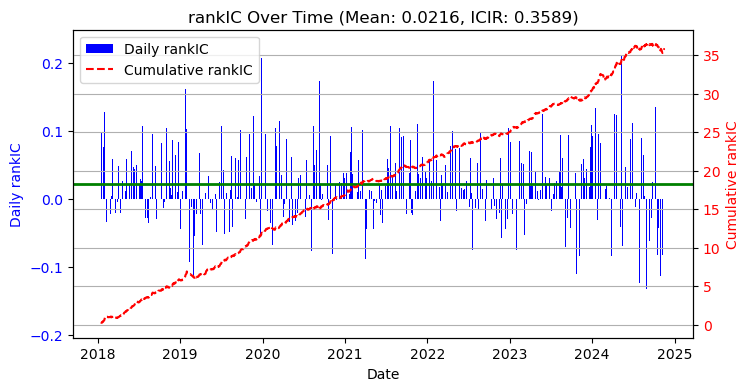

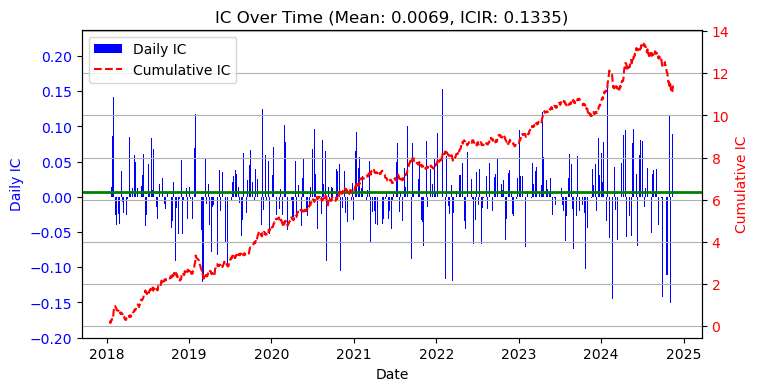

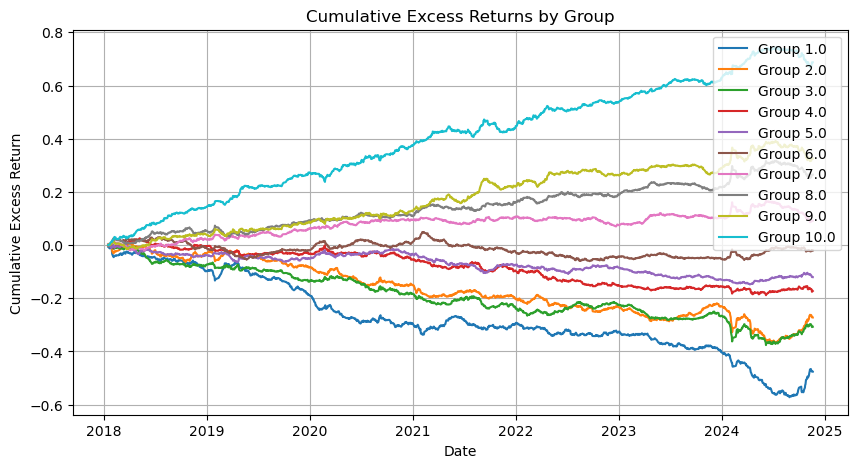

,net_excess_return,gross_excess_return,sharpe_net,sharpe_gross,turnover_rate
quantile,,,,,
0.0,-0.093122,-0.071810,-2.219883,-1.716468,0.071041
1.0,-0.083745,-0.041085,-2.021461,-0.997334,0.142198
2.0,-0.097398,-0.046345,-2.575244,-1.233220,0.170176
3.0,-0.082121,-0.026058,-2.678730,-0.856834,0.186879
4.0,-0.077690,-0.018192,-2.908565,-0.687203,0.198327
5.0,-0.065539,-0.003039,-2.362905,-0.110177,0.208333
6.0,-0.050468,0.013861,-1.730769,0.477252,0.214430
7.0,-0.021635,0.039977,-0.652288,1.202719,0.205373
8.0,-0.002273,0.049125,-0.060450,1.302931,0.171327


In [25]:
calculate_and_plot_ic(df_rpe, factor='neu_PRM_process', ret='ret_daily', ic_type='both')

# 算benchmark
df1 = calculate_benchmark_return(df_rpe, 'neu_PRM_process', 'ret_overnight', 'ret_day', 'ret_daily')

df1['neu_PRM_process'] = df1['neu_PRM_process'].astype('float')

# 分组
df1 = custom_quantile_grouping(df1, 'date', 'neu_PRM_process')

pnl_result = get_pnl(df1)

plot_cumulative_returns(pnl_result.pivot(index='date', columns='quantile', values='cum_gross_excess'))

calculate_annual_metrics(pnl_result)

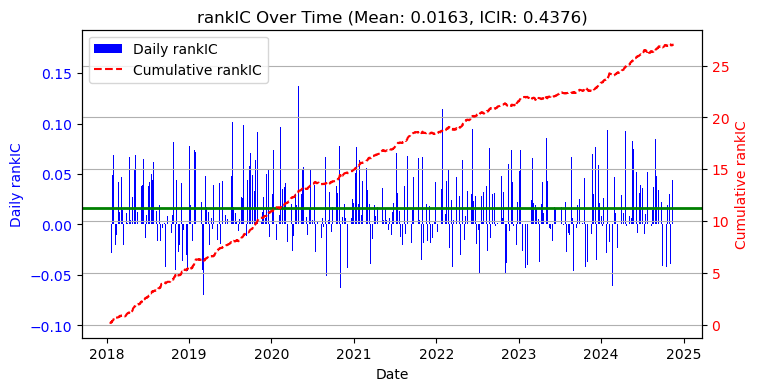

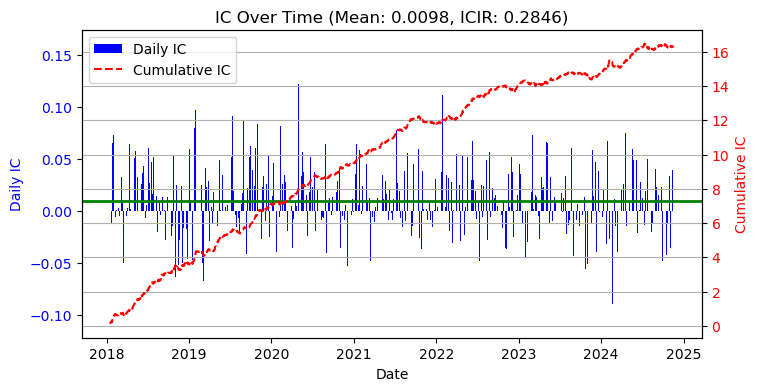

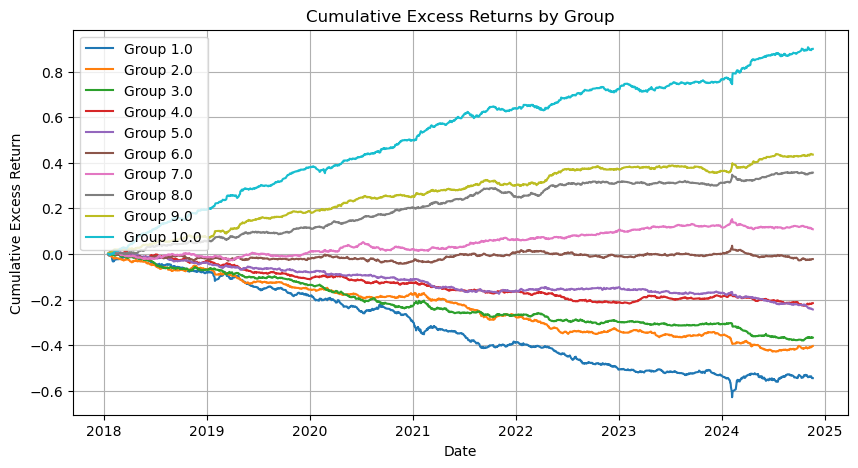

,net_excess_return,gross_excess_return,sharpe_net,sharpe_gross,turnover_rate
quantile,,,,,
0.0,-0.122805,-0.082201,-3.099945,-2.087700,0.135346
1.0,-0.140326,-0.060911,-4.896992,-2.150698,0.264719
2.0,-0.147714,-0.055351,-5.704175,-2.175649,0.307874
3.0,-0.130677,-0.032566,-5.452423,-1.388445,0.327036
4.0,-0.137472,-0.036752,-5.813416,-1.582597,0.335734
5.0,-0.105759,-0.003384,-4.487724,-0.144987,0.341250
6.0,-0.087130,0.016328,-3.680693,0.690106,0.344858
7.0,-0.046353,0.053772,-1.915139,2.207784,0.333750
8.0,-0.022156,0.065713,-0.807845,2.383423,0.292899


In [26]:
calculate_and_plot_ic(df_rpe, factor='neu_DST_zscore_process', ret='ret_daily', ic_type='both')

# 算benchmark
df1 = calculate_benchmark_return(df_rpe, 'neu_DST_zscore_process', 'ret_overnight', 'ret_day', 'ret_daily')

df1['neu_DST_zscore_process'] = df1['neu_DST_zscore_process'].astype('float')

# 分组
df1 = custom_quantile_grouping(df1, 'date', 'neu_DST_zscore_process')

pnl_result = get_pnl(df1)

plot_cumulative_returns(pnl_result.pivot(index='date', columns='quantile', values='cum_gross_excess'))

calculate_annual_metrics(pnl_result)

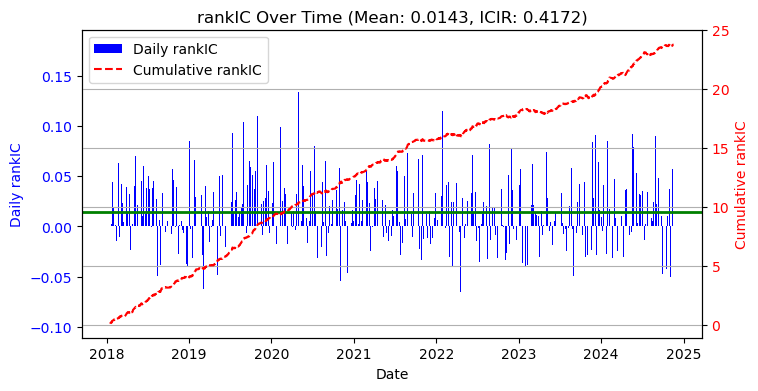

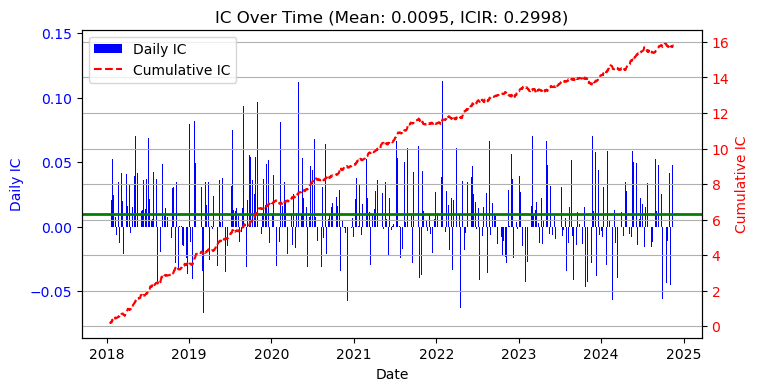

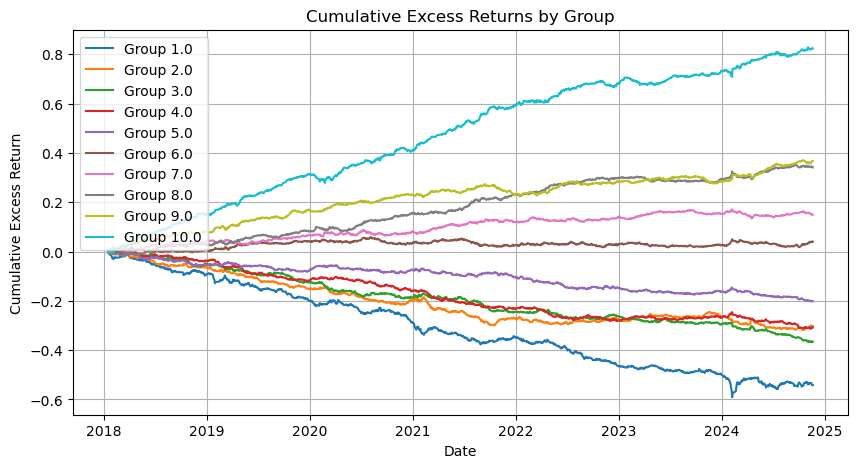

,net_excess_return,gross_excess_return,sharpe_net,sharpe_gross,turnover_rate
quantile,,,,,
0.0,-0.121623,-0.081764,-3.129641,-2.120824,0.132862
1.0,-0.122272,-0.045717,-4.331653,-1.645404,0.255184
2.0,-0.143692,-0.055118,-5.411162,-2.113677,0.295245
3.0,-0.140462,-0.046394,-5.863669,-1.983736,0.313562
4.0,-0.126989,-0.030458,-5.473336,-1.342235,0.321768
5.0,-0.092397,0.006023,-4.073226,0.268999,0.328067
6.0,-0.075947,0.022543,-3.297626,0.988701,0.328300
7.0,-0.043654,0.051519,-1.769592,2.090822,0.317243
8.0,-0.029466,0.055368,-1.122359,2.100912,0.282780


In [27]:
calculate_and_plot_ic(df_rpe, factor='neu_PRM_zscore_process', ret='ret_daily', ic_type='both')

# 算benchmark
df1 = calculate_benchmark_return(df_rpe, 'neu_PRM_zscore_process', 'ret_overnight', 'ret_day', 'ret_daily')

df1['neu_PRM_zscore_process'] = df1['neu_PRM_zscore_process'].astype('float')

# 分组
df1 = custom_quantile_grouping(df1, 'date', 'neu_PRM_zscore_process')

pnl_result = get_pnl(df1)

plot_cumulative_returns(pnl_result.pivot(index='date', columns='quantile', values='cum_gross_excess'))

calculate_annual_metrics(pnl_result)

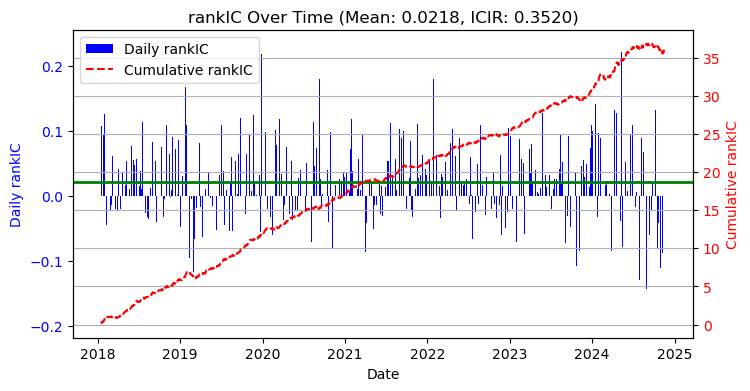

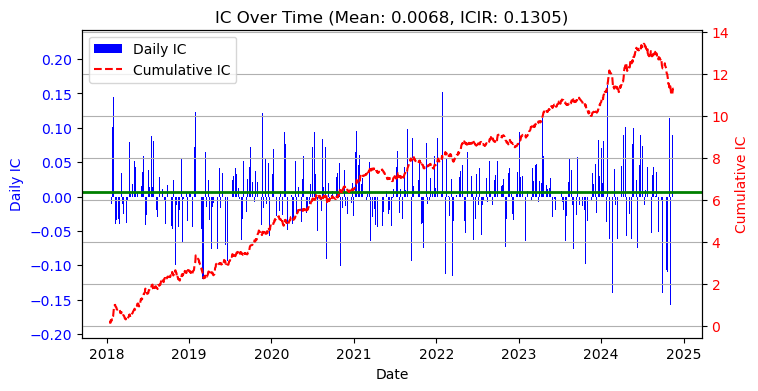

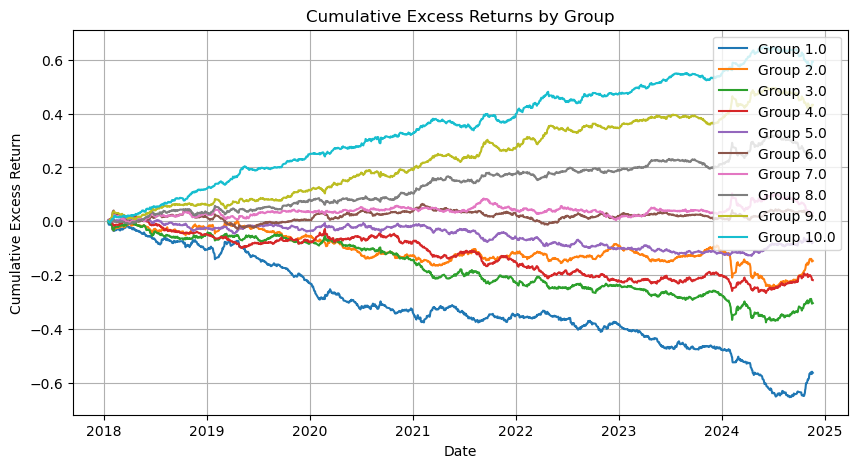

,net_excess_return,gross_excess_return,sharpe_net,sharpe_gross,turnover_rate
quantile,,,,,
0.0,-0.103448,-0.085079,-2.121458,-1.748160,0.061229
1.0,-0.058197,-0.022276,-1.286872,-0.494137,0.119736
2.0,-0.088850,-0.045990,-2.020136,-1.047644,0.142868
3.0,-0.081940,-0.033066,-2.010611,-0.812367,0.162914
4.0,-0.066091,-0.011883,-2.015409,-0.362757,0.180693
5.0,-0.054946,0.002818,-1.830570,0.093816,0.192546
6.0,-0.054630,0.004803,-1.607836,0.141438,0.198110
7.0,-0.020957,0.036152,-0.564258,0.973665,0.190361
8.0,0.018068,0.065262,0.441119,1.590935,0.157314


In [28]:
calculate_and_plot_ic(df_rpe, factor='neu_sector_neu_process', ret='ret_daily', ic_type='both')

# 算benchmark
df1 = calculate_benchmark_return(df_rpe, 'neu_sector_neu_process', 'ret_overnight', 'ret_day', 'ret_daily')

df1['neu_sector_neu_process'] = df1['neu_sector_neu_process'].astype('float')

# 分组
df1 = custom_quantile_grouping(df1, 'date', 'neu_sector_neu_process')

pnl_result = get_pnl(df1)

plot_cumulative_returns(pnl_result.pivot(index='date', columns='quantile', values='cum_gross_excess'))

calculate_annual_metrics(pnl_result)

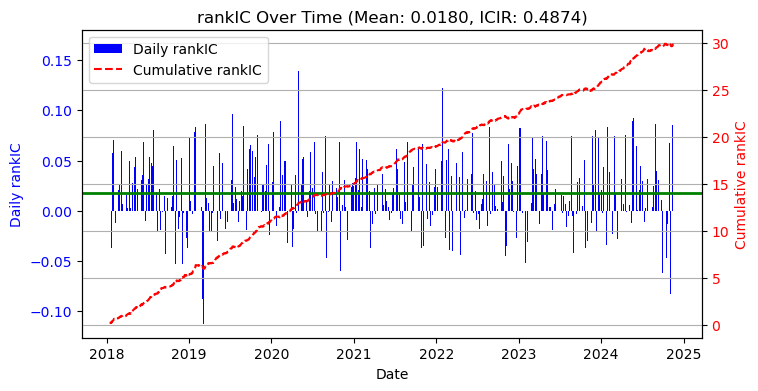

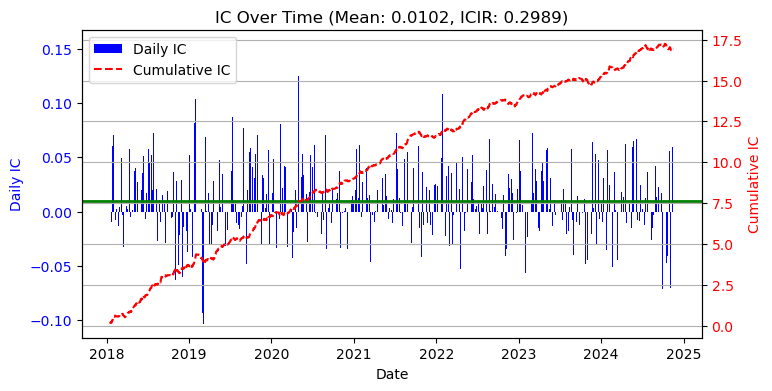

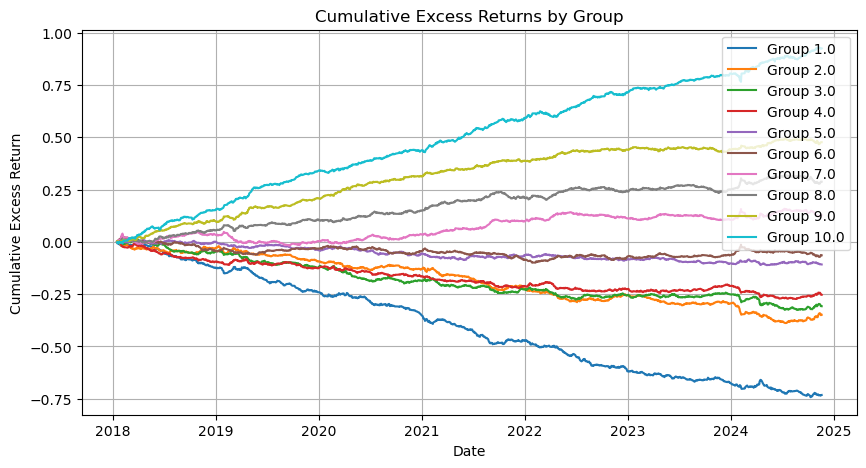

,net_excess_return,gross_excess_return,sharpe_net,sharpe_gross,turnover_rate
quantile,,,,,
0.0,-0.147054,-0.110483,-4.346468,-3.292270,0.121901
1.0,-0.123434,-0.052647,-3.934168,-1.695232,0.235960
2.0,-0.128571,-0.046440,-4.176819,-1.526335,0.273770
3.0,-0.125950,-0.038201,-4.649376,-1.425677,0.292496
4.0,-0.107507,-0.016324,-4.503285,-0.692920,0.303944
5.0,-0.104125,-0.009684,-4.069603,-0.381944,0.314803
6.0,-0.077449,0.019328,-2.677972,0.670377,0.322591
7.0,-0.050183,0.043406,-1.707686,1.476858,0.311963
8.0,-0.007773,0.071885,-0.278050,2.552378,0.265526


In [29]:
calculate_and_plot_ic(df_rpe, factor='neu_sector_neu_zscore_process', ret='ret_daily', ic_type='both')

# 算benchmark
df1 = calculate_benchmark_return(df_rpe, 'neu_sector_neu_zscore_process', 'ret_overnight', 'ret_day', 'ret_daily')

df1['neu_sector_neu_zscore_process'] = df1['neu_sector_neu_zscore_process'].astype('float')

# 分组
df1 = custom_quantile_grouping(df1, 'date', 'neu_sector_neu_zscore_process')

pnl_result = get_pnl(df1)

plot_cumulative_returns(pnl_result.pivot(index='date', columns='quantile', values='cum_gross_excess'))

calculate_annual_metrics(pnl_result)